In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
import olx
import cPickle as pickle

# Download and save data (optional)

In [116]:
tc = olx.olxChecker('motoryzacja/samochody/nissan/almera')

In [ ]:
ofrs = tc.getAllOffers()

In [ ]:
offrs_dtls = []
for i, offer in enumerate(ofrs):
    print i
    if offer[0] == 'www.olx.pl':
        offrs_dtls += [tc.getOfferDetail(offer[1])]

In [ ]:
with open('data_er5.pkl', 'w') as f:
    pickle.dump((ofrs,offrs_dtls), f)

# Load data

In [126]:
with open('data_mondeo.pkl', 'r') as f:
    ofrs, offrs_dtls = pickle.load(f)

# Analysis

In [127]:
def by_year_stats(fltr=None):
    by_year_stats = {'price' : {}}
    for offer in offrs_dtls:
        if 'Rok produkcji' in offer['details']:
            if fltr is not None and not fltr(offer):
                continue
            rp = offer['details']['Rok produkcji']
            by_year_stats['price'][rp] = by_year_stats['price'].get(rp, []) + [offer['price']]
    years = []
    counts = []
    means = []
    medians = []
    for year in sorted(by_year_stats['price'].keys()):
        years += [year]
        counts += [len(by_year_stats['price'][year])]
        means += [numpy.mean(by_year_stats['price'][year])]
        medians += [numpy.median(by_year_stats['price'][year])]
    figsize(10,15)
    subplot(211)
    title('Count of offers by year')
    plot(years, counts)
    subplot(212)
    title('Mean of offers by year')
    plot(years, means)
    for i,y in enumerate(years):
        print "{} {}".format(y, means[i])
    figsize(10,10)
    
def find_by_type(path):
    types = {}
    for ofr in offrs_dtls:
        ctype = ofr
        for p in path:
            ctype = ctype[p]
        types[ctype] = types.get(ctype, 0) + 1
    for ctype in types.keys():
        print "{}: {}".format(ctype, types[ctype])
    

1993 1350.0
1994 1400.0
1995 1000.0
1996 1419.75
1997 1781.25
1998 2019.9
1999 1942.85714286
2000 2519.6
2001 4842.27586207
2002 5714.17241379
2003 5263.17391304
2004 7614.70588235
2005 6871.42857143
2006 9828.5
2007 20715.0
2008 22076.6666667
2009 27671.4285714
2010 30380.0
2011 28850.0
2012 32200.0
2013 47999.5
2014 76000.0


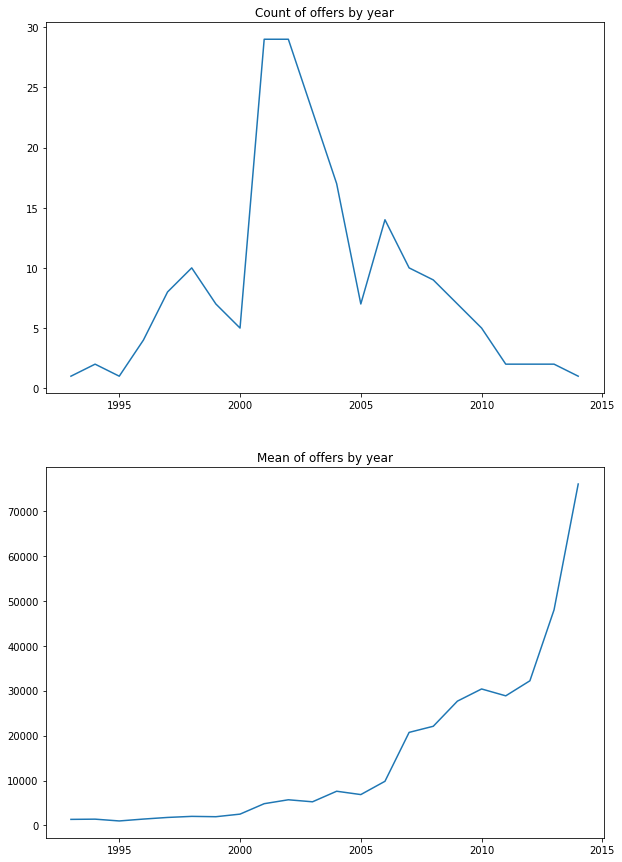

In [128]:
by_year_stats()

1995 1000.0
1997 1700.0
1998 2449.5
1999 2100.0
2000 2774.75
2001 4158.5
2002 5315.6
2003 5252.78947368
2004 6390.0
2005 6871.42857143
2006 9853.76923077
2007 19761.1111111
2008 21462.5
2009 26950.0
2010 26033.3333333
2011 28850.0
2012 32200.0


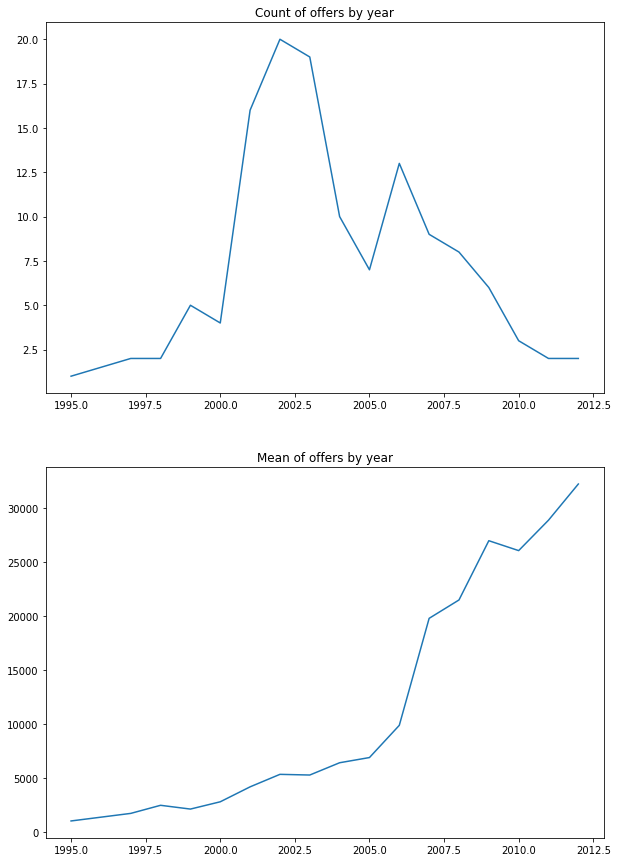

In [129]:
by_year_stats(lambda ofr: ofr['details']['Paliwo'] == 'Diesel')

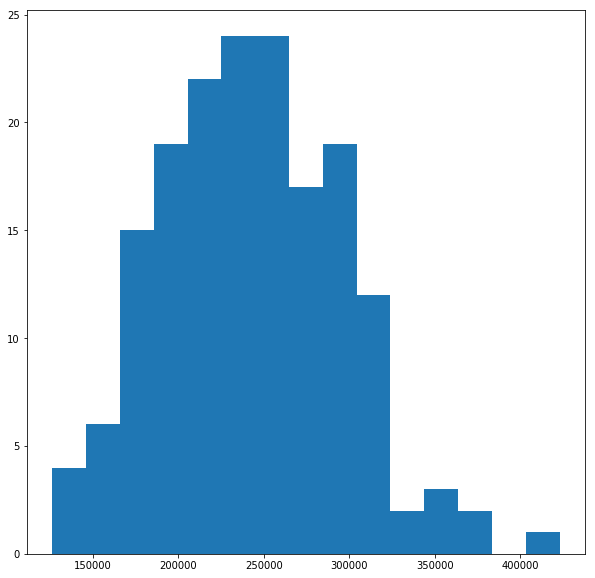

In [130]:
przebiegi = []
for ofr in offrs_dtls:
    przebieg = int(ofr['details']['Przebieg'][:-2].replace(' ',''))
    if przebieg > 100000 and przebieg < 1000000:
        przebiegi += [przebieg]
_ = hist(przebiegi, bins=15)

In [131]:
find_by_type(['details', 'Paliwo'])

LPG: 22
Benzyna: 44
Diesel: 129


In [132]:
find_by_type(['details', u'Skrzynia biegów'])

Manualna: 175
Automatyczna: 20
